# TITLE
## Summer 2024 Data Science Project

**By Matvey Lyapin**

### Introduction

### Data Curation

In [20]:
## Import important stuff.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator # for nice-lookin plots
import scipy.stats as statsim
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
xlsx = pd.ExcelFile("datasets/whr/src/WHR_Tab2.1.xls")
whole_whr = pd.read_excel(xlsx, "Sheet1")
print(whole_whr)

     Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008     3.723590            7.350416        0.450662   
1     Afghanistan  2009     4.401778            7.508646        0.552308   
2     Afghanistan  2010     4.758381            7.613900        0.539075   
3     Afghanistan  2011     3.831719            7.581259        0.521104   
4     Afghanistan  2012     3.782938            7.660506        0.520637   
...           ...   ...          ...                 ...             ...   
2358     Zimbabwe  2019     2.693523            7.697755        0.759162   
2359     Zimbabwe  2020     3.159802            7.596050        0.717243   
2360     Zimbabwe  2021     3.154578            7.656878        0.685151   
2361     Zimbabwe  2022     3.296220            7.670073        0.666172   
2362     Zimbabwe  2023     3.572386            7.678590        0.693817   

      Healthy life expectancy at birth  Freedom to make life choices  \
0              

In [6]:
whr = whole_whr[['Country name', 'year', 'Life Ladder']]
print(whr)

     Country name  year  Life Ladder
0     Afghanistan  2008     3.723590
1     Afghanistan  2009     4.401778
2     Afghanistan  2010     4.758381
3     Afghanistan  2011     3.831719
4     Afghanistan  2012     3.782938
...           ...   ...          ...
2358     Zimbabwe  2019     2.693523
2359     Zimbabwe  2020     3.159802
2360     Zimbabwe  2021     3.154578
2361     Zimbabwe  2022     3.296220
2362     Zimbabwe  2023     3.572386

[2363 rows x 3 columns]


### Exploratory Data Analysis

### Primary Analysis

In [29]:
class HapModel:
    def __init__(self, country):
        country_whr = whr[whr['Country name'] == country]

        self.name = country
        self.X = country_whr['year'].to_numpy().reshape(-1, 1)
        self.y = country_whr['Life Ladder'].to_numpy().reshape(-1, 1)
        self.model = LinearRegression().fit(self.X, self.y)
        self.y_pred = self.model.predict(self.X)

    def plot(self):
        fig, axes = plt.subplots()

        axes.scatter(self.X, self.y, color='blue', label='Data')
        axes.plot(self.X, self.y_pred, color='red', label='Linear Regression')
        axes.xaxis.set_major_locator(MaxNLocator(integer=True))
        axes.set_title(f'{self.name}\'s Life Ladder Over Time')
        axes.set_ylabel('Life Ladder Score')
        axes.set_xlabel('Year')
        axes.legend()

        plt.show()
        print(f'{self.name} regression performance metrics:')
        print(f' - MSE: {mean_squared_error(self.y, self.y_pred)}')
        print(f' - R2: {r2_score(self.y, self.y_pred)}')
    
    def predict_happiness(self, year):
        return self.model.predict(year)

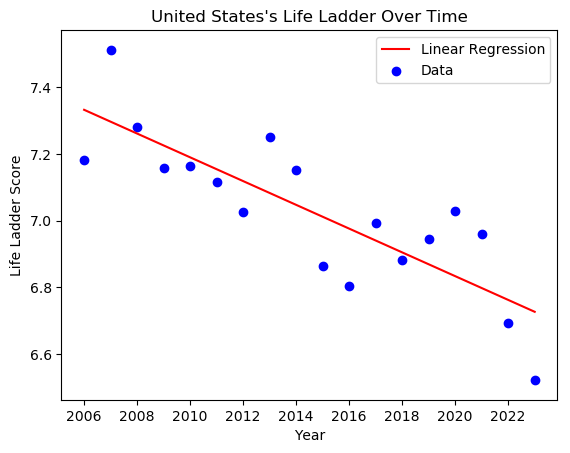

United States Regression Performance Metrics:
 - MSE: 0.01636995950222191
 - R2: 0.6763296311460378


In [28]:
h1 = HapModel('United States')
h1.plot()

### Visualization

### Insights and Conclusions